In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/verbalised_claims_df_final.csv')
df.shape

(1302, 24)

In [3]:
print(df.shape)
df = df.sample(frac=1, random_state=42).drop_duplicates('reference_id').sort_index().reset_index(drop=True)
# This is NOT dropping claims with same reference_id due to redudancy, it's just selecting a single claim from
# each reference instead of evaluating all claims
df.shape

(1302, 24)


(648, 24)

In [4]:
bad_netloc_aggs = [
    'witches.shca.ed.ac.uk', #Single infobox
    'en.isabart.org', #Single infobox
    'bechdeltest.com', #HAS API
    'npg.si.edu', #Image and single infobox
    'www.guidetopharmacology.org', #Single infobox
    'letterboxd.com', #Single infobox and has API
    'www.discogs.com', #Single infobox
    'vocab.getty.edu', #HAS JSON DUMPS
    'www.isfdb.org', #single infobox
    'www.npg.org.uk', #set of infoboxes
    'art.nationalgalleries.org', #image and single infobox
    'www.tate.org.uk', #image and single infobox
    'www.getty.edu', #HAS JSON DUMPS
    'memory-beta.fandom.com', #The portion with the information on Claims is just a long list of names and links
    'www.disease-ontology.org', #A single infobox
    'artgallery.yale.edu', #Image and a single infobox
    'www.imdb.com', #These are author pages and consist of a portrait, an infobox, and lists of movies
    'muckrack.com', #A very short infobox
    'live.dbpedia.org', #It's dbpedia, so it's mainly a huge infobox and there are dumps
    'dbpedia.org' #Same as above
]
df_refs = pd.read_csv('../data/reference_html_as_sentences_df.csv')
df = pd.merge(df, df_refs[['reference_id','netloc_agg']], on='reference_id', how='left')
df = df[~df.netloc_agg.isin(bad_netloc_aggs)].reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   index                                     409 non-null    int64 
 1   reference_id                              409 non-null    object
 2   entity_id                                 409 non-null    object
 3   claim_id                                  409 non-null    object
 4   reference_claim_id                        409 non-null    object
 5   rank                                      409 non-null    object
 6   property_id                               409 non-null    object
 7   datatype                                  409 non-null    object
 8   entity_label                              409 non-null    object
 9   entity_desc                               409 non-null    object
 10  property_label                            409 non-

In [6]:
df.claim_id.unique().shape[0] # there is a repeated claim, but that's ok

409

In [7]:
df.reference_id.unique().shape[0]
# remember some were dropped due to duplicated verbalisation and URL, as their claims depend on qualifiers but
# have otherwise identical URL and claim triple

409

In [8]:
df.property_label.unique().shape[0]

76

<AxesSubplot:xlabel='count', ylabel='netloc_agg'>

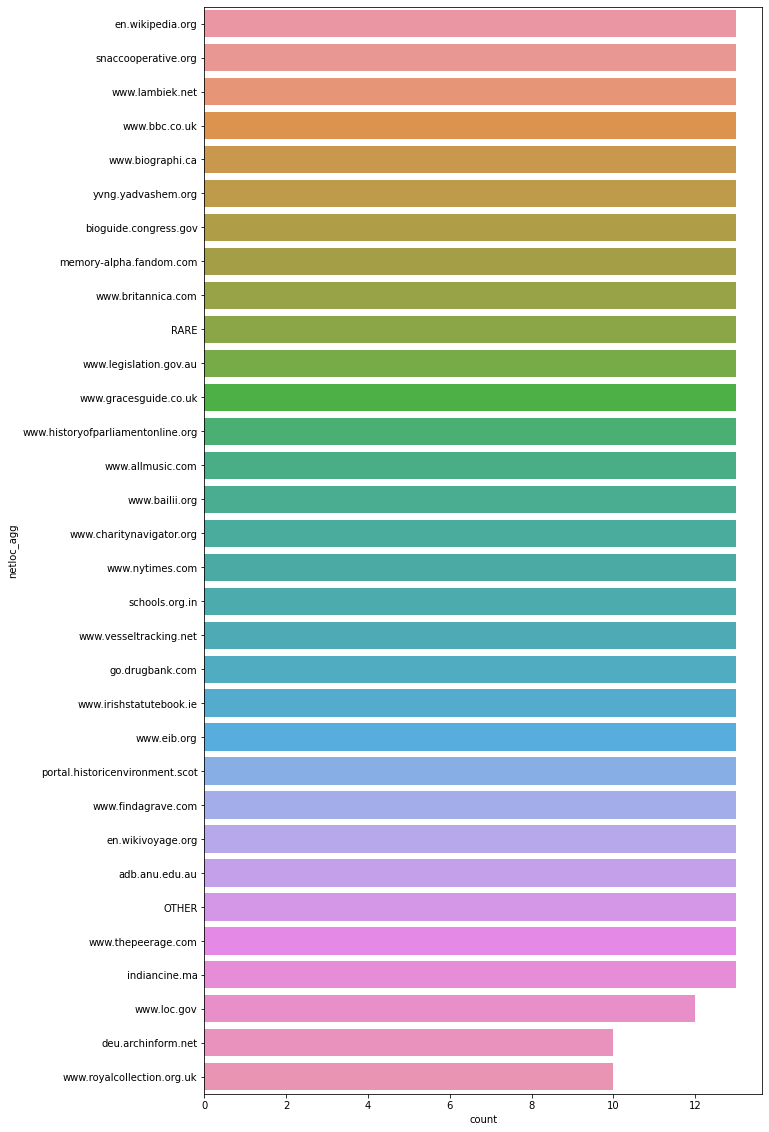

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

sns.countplot(
    data = df,
    y='netloc_agg',
    orient='h',
    order=df.netloc_agg.value_counts().index,
)

<AxesSubplot:xlabel='count', ylabel='property_label'>

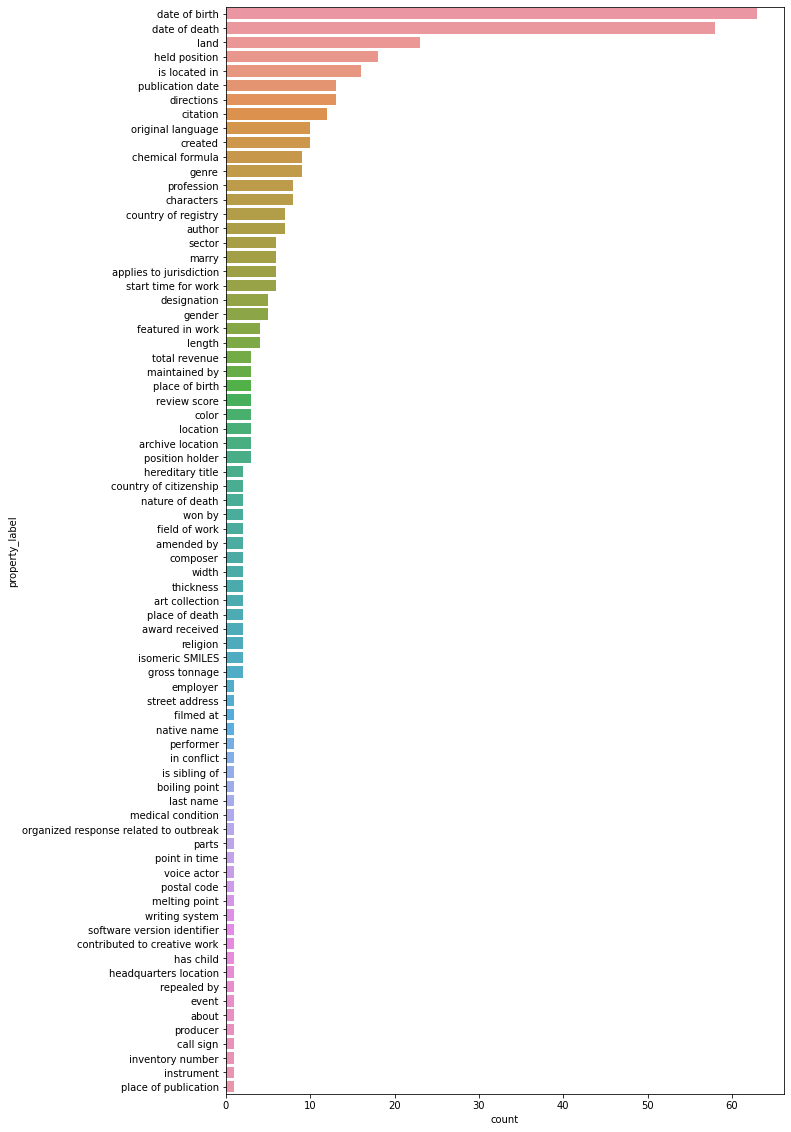

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,20))

sns.countplot(
    data = df,
    y='property_label',
    orient='h',
    order=df.property_label.value_counts().index,
)

In [43]:
df.property_id.value_counts()

P569     63
P570     58
P17      23
P39      18
P131     16
         ..
P162      1
P2317     1
P217      1
P1303     1
P291      1
Name: property_id, Length: 76, dtype: int64

<AxesSubplot:xlabel='count', ylabel='rank'>

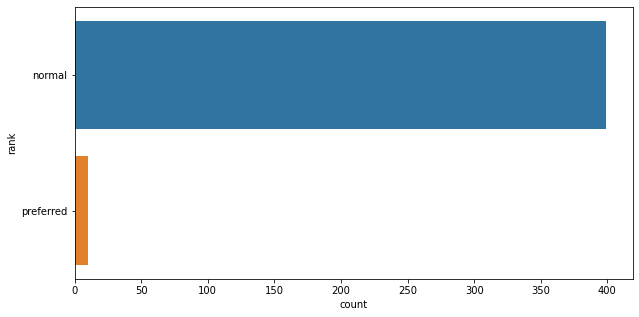

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.countplot(
    data = df,
    y='rank',
    orient='h',
    order=df['rank'].value_counts().index,
)

<AxesSubplot:xlabel='count', ylabel='datatype'>

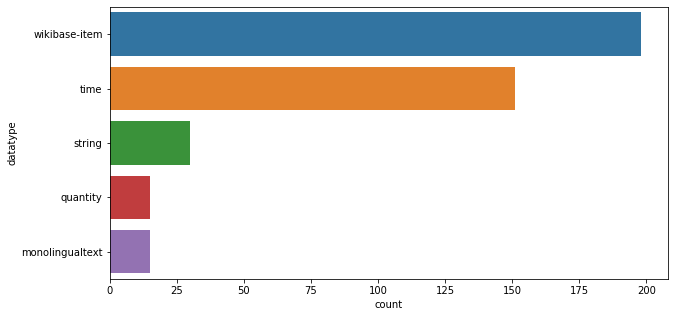

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.countplot(
    data = df,
    y='datatype',
    orient='h',
    order=df['datatype'].value_counts().index,
)

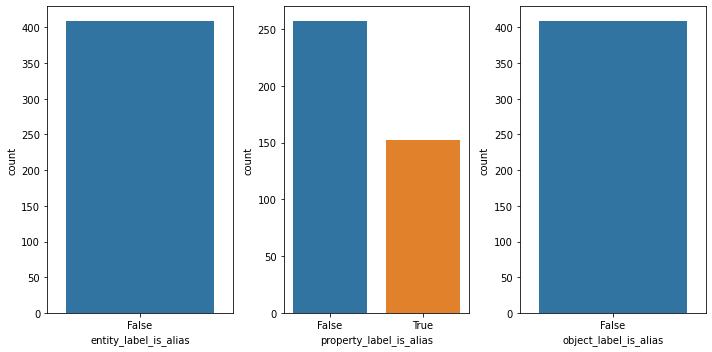

In [13]:
fig, ax = plt.subplots(1,3,figsize=(10,5))

for i, l in enumerate(['entity','property','object']):
    sns.countplot(
        data = df,
        x=f'{l}_label_is_alias',
        orient='v',
        order=df[f'{l}_label_is_alias'].value_counts().index,
        ax=ax[i]
    )
plt.tight_layout()
plt.show()

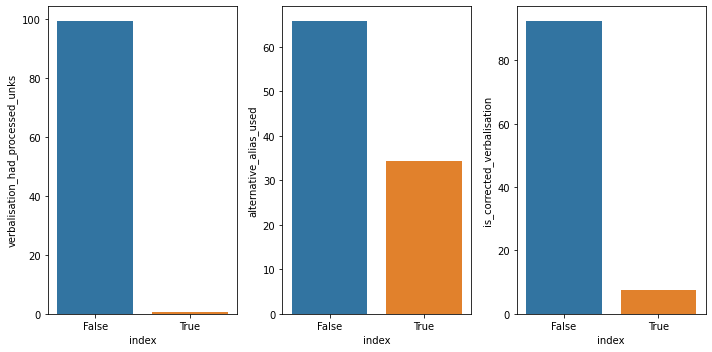

In [14]:
fig, ax = plt.subplots(1,3,figsize=(10,5))

df_temp = df.apply(
    lambda row : row['verbalisation'] != row['verbalisation_unks_replaced_then_dropped']
, axis=1)

df_temp.name = 'verbalisation_had_processed_unks'

sns.barplot(
    data = df_temp.value_counts(normalize=True).mul(100).reset_index(),
    y = 'verbalisation_had_processed_unks',
    x='index',
    orient='v',
    ax=ax[0], 
)

sns.barplot(
    data = df['alternative_alias_used'].value_counts(normalize=True).mul(100).reset_index(),
    y = 'alternative_alias_used',
    x='index',
    orient='v',
    ax=ax[1]
)

sns.barplot(
    data = df['is_corrected_verbalisation'].value_counts(normalize=True).mul(100).reset_index(),
    y = 'is_corrected_verbalisation',
    x='index',
    orient='v',
    ax=ax[2]
)
plt.tight_layout()
plt.show()

In [32]:
df.shape[0]

409

In [31]:
df[~df['alternative_alias_used'] & ~df['is_corrected_verbalisation']].shape[0]/df.shape[0]

0.6259168704156479

In [33]:
df[df['alternative_alias_used'] & ~df['is_corrected_verbalisation']].shape[0]/df.shape[0]

0.2982885085574572

In [35]:
62.6 + 29.8

92.4

Distribution of normalised levenshtein distance after corrections.
count    31.000000
mean      0.222812
std       0.244262
min       0.011905
25%       0.038701
50%       0.166667
75%       0.244505
max       0.826087
dtype: float64
0.16666666666666666


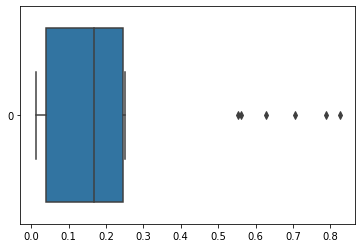

In [26]:
from Levenshtein import distance as levenshtein_distance

norm_levenshtein_distances = df.apply(
    lambda row : levenshtein_distance(
        row['corrected_verbalisation'],
        row['verbalisation_unks_replaced_then_dropped']
    )/max(
        len(row['corrected_verbalisation']),
        len(row['verbalisation_unks_replaced_then_dropped'])
    ),
    axis=1
)
norm_levenshtein_distances = norm_levenshtein_distances[norm_levenshtein_distances>0].reset_index(drop=True)
sns.boxplot(data=norm_levenshtein_distances, orient='h')
print('Distribution of normalised levenshtein distance after corrections.')
print(norm_levenshtein_distances.describe())
print(norm_levenshtein_distances.median())

In [40]:
norm_levenshtein_distances.quantile(0.80)

0.25

In [54]:
df.groupby(['property_id','property_label']).is_corrected_verbalisation.mean().sort_values()

property_id  property_label                        
P2568        repealed by                               0.0
P2567        amended by                                0.0
P921         about                                     0.0
P2610        thickness                                 0.0
P27          country of citizenship                    0.0
                                                      ... 
P2017        isomeric SMILES                           1.0
P793         event                                     1.0
P8045        organized response related to outbreak    1.0
P2101        melting point                             1.0
P1308        position holder                           1.0
Name: is_corrected_verbalisation, Length: 76, dtype: float64

In [53]:
df.groupby(['property_id','property_label']).is_corrected_verbalisation.mean().sort_values()[-20:]

property_id  property_label                        
P21          gender                                    0.000000
P101         field of work                             0.000000
P570         date of death                             0.017241
P17          land                                      0.043478
P8047        country of registry                       0.142857
P1001        applies to jurisdiction                   0.166667
P2031        start time for work                       0.166667
P26          marry                                     0.166667
P1435        designation                               0.200000
P136         genre                                     0.444444
P195         art collection                            0.500000
P674         characters                                0.500000
P452         sector                                    0.500000
P2139        total revenue                             1.000000
P725         voice actor                            

In [58]:
df.groupby('datatype').index.count()/df.shape[0]

datatype
monolingualtext    0.036675
quantity           0.036675
string             0.073350
time               0.369193
wikibase-item      0.484108
Name: index, dtype: float64